# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

In [10]:
cities

['rikitea',
 'san patricio',
 'dunedin',
 'qaanaaq',
 'illoqqortoormiut',
 'flinders',
 'utiroa',
 'cayenne',
 'te anau',
 'ushuaia',
 'bethel',
 'lavrentiya',
 'nanortalik',
 'vaini',
 'cockburn town',
 'acapulco',
 'cherskiy',
 'bluff',
 'kapaa',
 'severo-kurilsk',
 'torbay',
 'punta arenas',
 'talnakh',
 'wonthaggi',
 'ribeira grande',
 'busselton',
 'bambous virieux',
 'khatanga',
 'new norfolk',
 'cape town',
 'la asuncion',
 'palabuhanratu',
 'hilo',
 'katobu',
 'kodiak',
 'cabo san lucas',
 'kaitangata',
 'borogontsy',
 'lebu',
 'taolanaro',
 'fowa',
 'amderma',
 'arraial do cabo',
 'berea',
 'nikolskoye',
 'hermanus',
 'kargasok',
 'attawapiskat',
 'ilulissat',
 'grand river south east',
 'krasna lipa',
 'saint-francois',
 'qena',
 'tuktoyaktuk',
 'rio grande',
 'vestmannaeyjar',
 'thompson',
 'umm kaddadah',
 'kenai',
 'bilibino',
 'azimur',
 'dikson',
 'avarua',
 'kon tum',
 'camacha',
 'mezhdurechensk',
 'ternate',
 'moree',
 'mildura',
 'hobart',
 'saskylakh',
 'saint-josep

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
#Create Cities dataframe with list pulled from citipy
cities_df = pd.DataFrame({'City':cities})
cities_df.head()

,City
0,rikitea
1,san patricio
2,dunedin
3,qaanaaq
4,illoqqortoormiut


In [12]:
#Add columns to df to fill out
cities_df['Cloudiness'] = ""
cities_df['Country'] = ""
cities_df['Date'] = ""
cities_df['Humidity'] = ""
cities_df['Lat'] = ""
cities_df['Lng'] = ""
cities_df['Max Temp'] = ""
cities_df['Wind Speed'] = ""

cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,,,,,,,,
1,san patricio,,,,,,,,
2,dunedin,,,,,,,,
3,qaanaaq,,,,,,,,
4,illoqqortoormiut,,,,,,,,


In [13]:
#Build API URL to get data from open weather
base_url = "http://api.openweathermap.org/data/2.5/weather"
params = {
    "units": "metric",
    "appid": weather_api_key,
}
#iterrows to iterate through pandas city dataframe
for index, row in cities_df.iterrows():

    #Get city from cities dataframe
    city = row['City']

    #Add q parameter to params dict
    params['q'] = city

    #Build url and API request
    print(f"Processing record {index}: {city}.")
    response = requests.get(base_url, params=params).json()
    
    try:
        #Fill out cities df with data from API
        cities_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        cities_df.loc[index, 'Country'] = response['sys']['country']
        cities_df.loc[index, 'Date'] = response['dt']
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Lng'] = response['coord']['lon']
        cities_df.loc[index, 'Lat'] = response['coord']['lat']
        cities_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
    except (KeyError, IndexError):
        print("Missing result, skipping.")
        
    print("------------")

Processing record 0: rikitea.
------------
Processing record 1: san patricio.
------------
Processing record 2: dunedin.
------------
Processing record 3: qaanaaq.
------------
Processing record 4: illoqqortoormiut.
Missing result, skipping.
------------
Processing record 5: flinders.
------------
Processing record 6: utiroa.
Missing result, skipping.
------------
Processing record 7: cayenne.
------------
Processing record 8: te anau.
------------
Processing record 9: ushuaia.
------------
Processing record 10: bethel.
------------
Processing record 11: lavrentiya.
------------
Processing record 12: nanortalik.
------------
Processing record 13: vaini.
------------
Processing record 14: cockburn town.
------------
Processing record 15: acapulco.
------------
Processing record 16: cherskiy.
------------
Processing record 17: bluff.
------------
Processing record 18: kapaa.
------------
Processing record 19: severo-kurilsk.
------------
Processing record 20: torbay.
------------
Process

------------
Processing record 170: butaritari.
------------
Processing record 171: nioro.
------------
Processing record 172: ust-kuyga.
------------
Processing record 173: opunake.
------------
Processing record 174: pisco.
------------
Processing record 175: duz.
Missing result, skipping.
------------
Processing record 176: shieli.
------------
Processing record 177: nokaneng.
------------
Processing record 178: hasaki.
------------
Processing record 179: wuda.
------------
Processing record 180: port alfred.
------------
Processing record 181: norman wells.
------------
Processing record 182: tarnow.
------------
Processing record 183: kahului.
------------
Processing record 184: jalu.
------------
Processing record 185: pestyaki.
------------
Processing record 186: jumla.
------------
Processing record 187: labuhan.
------------
Processing record 188: baykit.
------------
Processing record 189: coxim.
------------
Processing record 190: cidreira.
------------
Processing record 191

------------
Processing record 343: antofagasta.
------------
Processing record 344: kalemie.
------------
Processing record 345: korla.
------------
Processing record 346: tuggurt.
Missing result, skipping.
------------
Processing record 347: halalo.
Missing result, skipping.
------------
Processing record 348: dingle.
------------
Processing record 349: shuangyang.
------------
Processing record 350: carbonia.
------------
Processing record 351: doctor pedro p. pena.
Missing result, skipping.
------------
Processing record 352: colac.
------------
Processing record 353: zhigansk.
------------
Processing record 354: hambantota.
------------
Processing record 355: rovaniemi.
------------
Processing record 356: sampit.
------------
Processing record 357: tingo maria.
------------
Processing record 358: umzimvubu.
Missing result, skipping.
------------
Processing record 359: collie.
------------
Processing record 360: verkhnevilyuysk.
------------
Processing record 361: namibe.
---------

------------
Processing record 510: santa cruz.
------------
Processing record 511: panaba.
------------
Processing record 512: great falls.
------------
Processing record 513: hargeysa.
------------
Processing record 514: progreso.
------------
Processing record 515: santander jimenez.
------------
Processing record 516: shepsi.
------------
Processing record 517: wenling.
------------
Processing record 518: teknaf.
------------
Processing record 519: la ronge.
------------
Processing record 520: seymchan.
------------
Processing record 521: dawei.
------------
Processing record 522: miles city.
------------
Processing record 523: de-kastri.
------------
Processing record 524: clarence town.
------------
Processing record 525: wajima.
------------
Processing record 526: ayr.
------------
Processing record 527: tuatapere.
------------
Processing record 528: caldas novas.
------------
Processing record 529: karratha.
------------
Processing record 530: boo.
------------
Processing recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
#Remove records with no data
cities_df=cities_df.loc[cities_df['Country']!='']

#Export clean cities df to CSV
cities_df.to_csv(output_data_file, index=True, index_label='City_ID')

In [15]:
#Display cities df
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,52,PF,1603298521,68,-23.12,-134.97,23.18,4.15
1,san patricio,20,US,1603298521,69,28.02,-97.52,31.11,4.6
2,dunedin,100,NZ,1603298521,69,-45.87,170.5,9.44,0.89
3,qaanaaq,84,GL,1603298072,81,77.48,-69.36,-7.22,3.32
5,flinders,99,AU,1603298523,87,-34.58,150.86,16.11,0.89
...,...,...,...,...,...,...,...,...,...
593,charters towers,3,AU,1603298746,91,-20.1,146.27,19.65,4.62
594,eureka,90,US,1603298747,100,40.8,-124.16,11.11,5.56
597,ancud,0,CL,1603298627,50,-41.87,-73.82,13,3.1
599,dogondoutchi,0,NE,1603298748,14,13.64,4.03,36.52,1.28


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

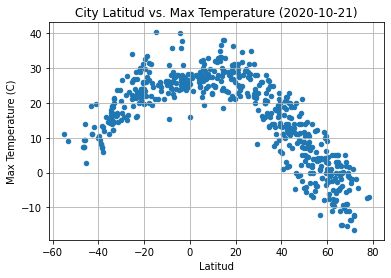

In [16]:
cities_df.plot(kind='scatter', x='Lat', y='Max Temp', grid=True)
plot_title=f"City Latitud vs. Max Temperature ({datetime.date.today()})"
plt.title(plot_title)
plt.xlabel("Latitud")
plt.ylabel("Max Temperature (C)")
plt.savefig(f'output_data/{plot_title}.png')
plt.show()

#### City Latitud vs Max Temperature Observations:
- First
- Second

#### Latitude vs. Humidity Plot

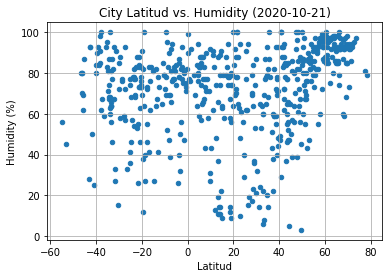

In [17]:
cities_df.plot(kind='scatter', x='Lat', y='Humidity', grid=True)
plot_title=f"City Latitud vs. Humidity ({datetime.date.today()})"
plt.title(plot_title)
plt.xlabel("Latitud")
plt.ylabel("Humidity (%)")
plt.savefig(f'output_data/{plot_title}.png')
plt.show()

#### City Latitud vs Humidity Observations:
- First
- Second

#### Latitude vs. Cloudiness Plot

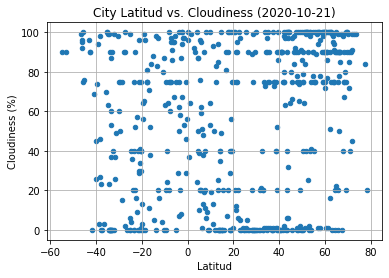

In [18]:
cities_df.plot(kind='scatter', x='Lat', y='Cloudiness', grid=True)
plot_title=f"City Latitud vs. Cloudiness ({datetime.date.today()})"
plt.title(plot_title)
plt.xlabel("Latitud")
plt.ylabel("Cloudiness (%)")
plt.savefig(f'output_data/{plot_title}.png')
plt.show()

#### City Latitud vs Cloudiness Observations:
- First
- Second

#### Latitude vs. Wind Speed Plot

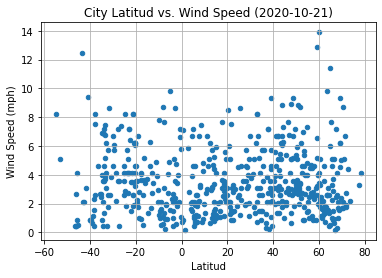

In [19]:
cities_df.plot(kind='scatter', x='Lat', y='Wind Speed', grid=True)
plot_title=f"City Latitud vs. Wind Speed ({datetime.date.today()})"
plt.title(plot_title)
plt.xlabel("Latitud")
plt.ylabel("Wind Speed (mph)")
plt.savefig(f'output_data/{plot_title}.png')
plt.show()

#### City Latitud vs Wind Speed Observations:
- First
- Second

## Linear Regression

In [20]:
# OPTIONAL: Create a function to create Linear Regression plots

#Create function for scatter plotter, passing x,y series and annotation location (x,y)
def linearPlot(x_series,y_series, x_ann, y_ann, hemisphere):
    #Assign x y values
    x_values = pd.to_numeric(x_series)
    y_values = pd.to_numeric(y_series)
    #Do calculations
    #Calculate linear regression model
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #Create plot
    plt.scatter(x_values,y_values, color='green')
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_ann,y_ann),fontsize=12,color="red")
    plt.xlabel('Latitud')
    plt.ylabel(y_values.name)
    print(f"The r-squared is: {rvalue**2}")
    plot_title=f'{hemisphere} Hemisphere - Latitud vs. {y_values.name}'
    plt.title(plot_title)
    plt.savefig(f'output_data/{plot_title}.png')
    plt.show()

In [21]:
# Create Northern and Southern Hemisphere DataFrames
#Nothern df
n_cities_df=cities_df.loc[cities_df['Lat'] >= 0]
#Southern df
s_cities_df=cities_df.loc[cities_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7925254711962467


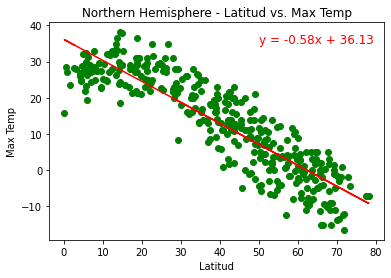

In [22]:
linearPlot(n_cities_df['Lat'],n_cities_df['Max Temp'],50,35,'Northern')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5861035576719397


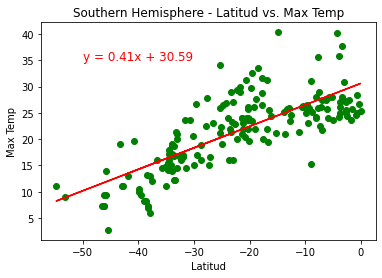

In [23]:
linearPlot(s_cities_df['Lat'],s_cities_df['Max Temp'],-50,35,'Southern')

### Observations by Hemisphere - Max Temp vs. Latitude:
- First
- Second

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1353438329629923


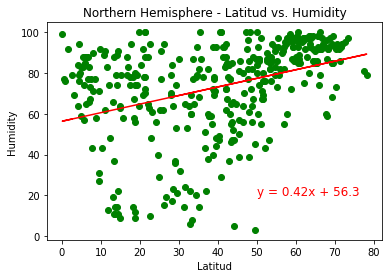

In [24]:
linearPlot(n_cities_df['Lat'],n_cities_df['Humidity'],50,20,'Northern')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0001588916720626175


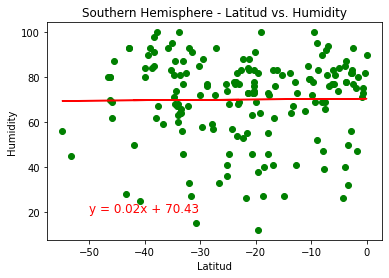

In [25]:
linearPlot(s_cities_df['Lat'],s_cities_df['Humidity'],-50,20,'Southern')

### Observations by Hemisphere - Humidity (%) vs. Latitude:
- First
- Second

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1019913497627751


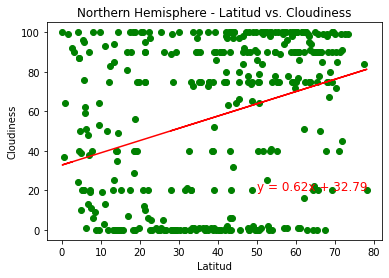

In [26]:
linearPlot(n_cities_df['Lat'],n_cities_df['Cloudiness'],50,20,'Northern')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0021723714174277063


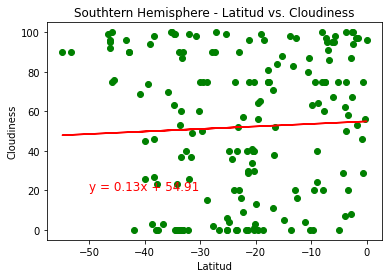

In [27]:
linearPlot(s_cities_df['Lat'],s_cities_df['Cloudiness'],-50,20,'Southtern')

### Observations by Hemisphere - Cloudiness (%) vs. Latitude:
- First
- Second

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.007268690991150221


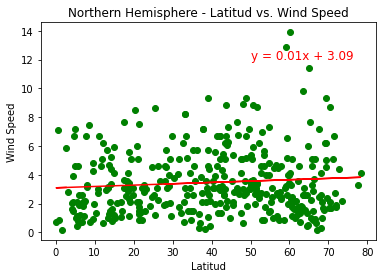

In [28]:
linearPlot(n_cities_df['Lat'],n_cities_df['Wind Speed'],50,12,'Northern')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.005801391187013068


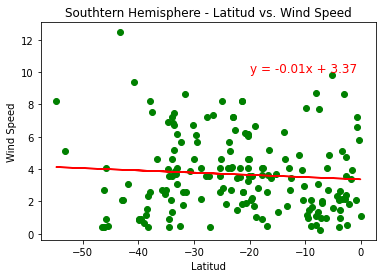

In [29]:
linearPlot(s_cities_df['Lat'],s_cities_df['Wind Speed'],-20,10,'Southtern')

### Observations by Hemisphere - Wind Speed vs. Latitude:
- First
- Second